In [3]:
import pandas as pd


In [4]:
# df = pd.read_csv('/content/diabetic_data.csv')
df = pd.read_csv("diabetic_data.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"Column '{col}': {count} '?' values")

Column 'race': 2273 '?' values
Column 'weight': 98569 '?' values
Column 'payer_code': 40256 '?' values
Column 'medical_specialty': 49949 '?' values
Column 'diag_1': 21 '?' values
Column 'diag_2': 358 '?' values
Column 'diag_3': 1423 '?' values


In [8]:
drop_cols = [
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'acetohexamide',
    'tolbutamide',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'max_glu_serum',
    'A1Cresult'
]

df = df.drop(columns=drop_cols)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

# Task
Replace missing values represented by '?' in the columns `race`, `diag_1`, `diag_2`, and `diag_3` of the file "diabetic_data.csv" based on other columns in the dataset.

## Analyze missing values

### Subtask:
Inspect the data to understand the distribution of missing values in `race`, `diag_1`, `diag_2`, and `diag_3`.


**Reasoning**:
Count the number of '?' values in the specified columns to understand the distribution of missing data.



In [10]:
for col in ['race', 'diag_1', 'diag_2', 'diag_3']:
    count = (df[col] == '?').sum()
    print(f"Column '{col}': {count} '?' values")

Column 'race': 2273 '?' values
Column 'diag_1': 21 '?' values
Column 'diag_2': 358 '?' values
Column 'diag_3': 1423 '?' values


## Explore relationships

### Subtask:
Investigate potential relationships between columns with missing values and other columns in the dataset to identify suitable columns for imputation.


**Reasoning**:
Investigate relationships between 'race' and 'gender' to see if gender distribution differs for missing race values.



In [11]:
print(df.loc[df['race'] == '?', 'gender'].value_counts())
print(df['gender'].value_counts())

gender
Male               1138
Female             1133
Unknown/Invalid       2
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


**Reasoning**:
Investigate the relationship between 'race' and 'age' to see if age distribution differs for missing race values.



In [12]:
print(df.loc[df['race'] == '?', 'age'].value_counts())
print(df['age'].value_counts())

age
[70-80)     599
[60-70)     495
[80-90)     397
[50-60)     361
[40-50)     220
[30-40)      76
[90-100)     69
[20-30)      46
[10-20)       9
[0-10)        1
Name: count, dtype: int64
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


**Reasoning**:
Investigate relationships between the 'diag_1' column with missing values and other relevant columns by looking at the distribution of 'diag_1' values grouped by 'race'.



In [13]:
print(df.loc[df['diag_1'] == '?', 'race'].value_counts())
print(df['race'].value_counts())

race
AfricanAmerican    9
Caucasian          7
?                  2
Hispanic           2
Asian              1
Name: count, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


**Reasoning**:
Investigate relationships between the 'diag_1' column with missing values and other relevant columns by looking at the distribution of 'diag_1' values grouped by 'gender'.



In [14]:
print(df.loc[df['diag_1'] == '?', 'gender'].value_counts())
print(df['gender'].value_counts())

gender
Male      16
Female     5
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


**Reasoning**:
Investigate relationships between the 'diag_2' column with missing values and other relevant columns by looking at the distribution of 'diag_2' values grouped by 'race'.



In [15]:
print(df.loc[df['diag_2'] == '?', 'race'].value_counts())
print(df['race'].value_counts())

race
Caucasian          260
AfricanAmerican     59
?                   22
Hispanic            12
Asian                3
Other                2
Name: count, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


**Reasoning**:
Investigate relationships between the 'diag_2' column with missing values and other relevant columns by looking at the distribution of 'diag_2' values grouped by 'gender'.



In [16]:
print(df.loc[df['diag_2'] == '?', 'gender'].value_counts())
print(df['gender'].value_counts())

gender
Female    180
Male      178
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


**Reasoning**:
Investigate relationships between the 'diag_3' column with missing values and other relevant columns by looking at the distribution of 'diag_3' values grouped by 'race' and 'gender'.



In [17]:
print(df.loc[df['diag_3'] == '?', 'race'].value_counts())
print(df.loc[df['diag_3'] == '?', 'gender'].value_counts())
print(df['race'].value_counts())
print(df['gender'].value_counts())

race
Caucasian          948
AfricanAmerican    314
?                   74
Hispanic            49
Other               22
Asian               16
Name: count, dtype: int64
gender
Female    739
Male      684
Name: count, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


## Impute missing values

### Subtask:
Based on the analysis, implement an appropriate imputation strategy for each column (`race`, `diag_1`, `diag_2`, and `diag_3`). This may involve using the mode, or a more sophisticated method based on the identified relationships.


**Reasoning**:
Implement the imputation strategy as outlined in the instructions, replacing '?' values in 'race' based on age group mode and in the 'diag' columns with the overall mode.



In [18]:
# Impute 'race' based on age group mode
for age_group in df['age'].unique():
    mode_race = df.loc[(df['age'] == age_group) & (df['race'] != '?'), 'race'].mode()
    if not mode_race.empty:
        df.loc[(df['age'] == age_group) & (df['race'] == '?'), 'race'] = mode_race[0]

# Impute 'diag_1', 'diag_2', and 'diag_3' with overall mode
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_diag = df[df[col] != '?'][col].mode()
    if not mode_diag.empty:
        df[col] = df[col].replace('?', mode_diag[0])

# Verify that all '?' values in these four columns have been replaced
for col in ['race', 'diag_1', 'diag_2', 'diag_3']:
    count = (df[col] == '?').sum()
    print(f"Column '{col}': {count} '?' values after imputation")

Column 'race': 0 '?' values after imputation
Column 'diag_1': 0 '?' values after imputation
Column 'diag_2': 0 '?' values after imputation
Column 'diag_3': 0 '?' values after imputation


## Verify imputation

### Subtask:
Check if the missing values in the specified columns have been replaced correctly.


**Reasoning**:
Iterate through the specified columns and count the occurrences of '?'.



In [19]:
for col in ['race', 'diag_1', 'diag_2', 'diag_3']:
    count = (df[col] == '?').sum()
    print(f"Column '{col}': {count} '?' values")

Column 'race': 0 '?' values
Column 'diag_1': 0 '?' values
Column 'diag_2': 0 '?' values
Column 'diag_3': 0 '?' values


## Summary:

### Data Analysis Key Findings

*   The initial inspection revealed that the `race` column had the most missing values with 2273, followed by `diag_3` (1423), `diag_2` (358), and `diag_1` (21).
*   When analyzing missing `race` values, the distribution of `gender` and `age` was somewhat similar to the overall distribution, although older individuals ([70-80), [60-70)) were slightly more prevalent among those with missing race information.
*   For missing `diag_1`, `diag_2`, and `diag_3` values, the distributions of `race` and `gender` for rows with missing diagnosis values generally mirrored the overall distributions of these columns.
*   Missing values in the `race` column were imputed using the mode specific to each age group.
*   Missing values in the `diag_1`, `diag_2`, and `diag_3` columns were imputed using the overall mode of each respective column.
*   After imputation, the verification step confirmed that there were no remaining '?' values in the `race`, `diag_1`, `diag_2`, and `diag_3` columns.

### Insights or Next Steps

*   While age-based imputation was used for `race`, exploring other columns or more sophisticated methods might yield better results for imputing the diagnosis columns (`diag_1`, `diag_2`, and `diag_3`), as simple mode imputation might not capture underlying patterns.
*   Consider documenting the imputation strategy and its potential impact on the analysis, especially for the `race` column where a significant number of values were imputed.


In [20]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


[Download preprocessed data](diabetic_data_preprocessed.csv)

# Random Forest classifier

In [21]:
# df = pd.read_csv("diabetesHospital/diabetic_data_preprocessed.csv")
df = pd.read_csv("diabetic_data_preprocessed.csv")

In [22]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
# Random Forest Classification for 3-class prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Check the target variable distribution
print("Target variable distribution:")
print(df['readmitted'].value_counts())
print("\nPercentages:")
print(df['readmitted'].value_counts(normalize=True) * 100)

Target variable distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentages:
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


In [24]:
# Prepare data for machine learning
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('readmitted')  # Remove target variable

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Separate features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 81412
Test set size: 20354
Number of features: 36


In [25]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'  # Handle class imbalance
)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.5233

Detailed Classification Report:
              precision    recall  f1-score   support

         <30       0.21      0.36      0.26      2272
         >30       0.47      0.34      0.40      7109
          NO       0.66      0.67      0.67     10973

    accuracy                           0.52     20354
   macro avg       0.44      0.46      0.44     20354
weighted avg       0.54      0.52      0.53     20354



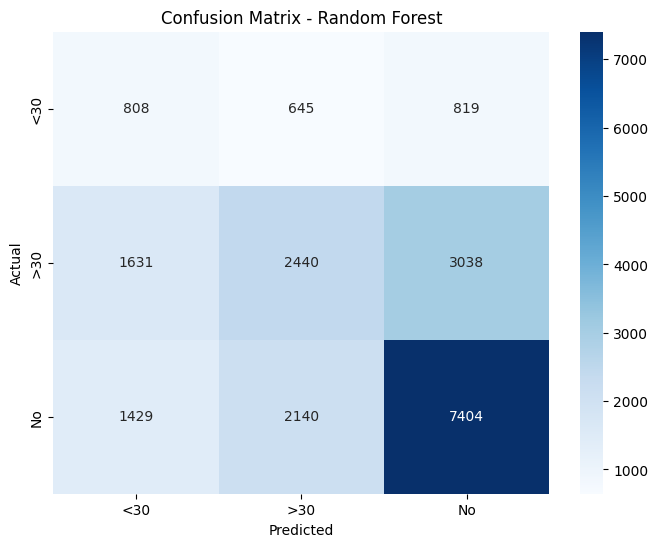

Confusion Matrix:
[[ 808  645  819]
 [1631 2440 3038]
 [1429 2140 7404]]


In [26]:
# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<30', '>30', 'No'],
            yticklabels=['<30', '>30', 'No'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)

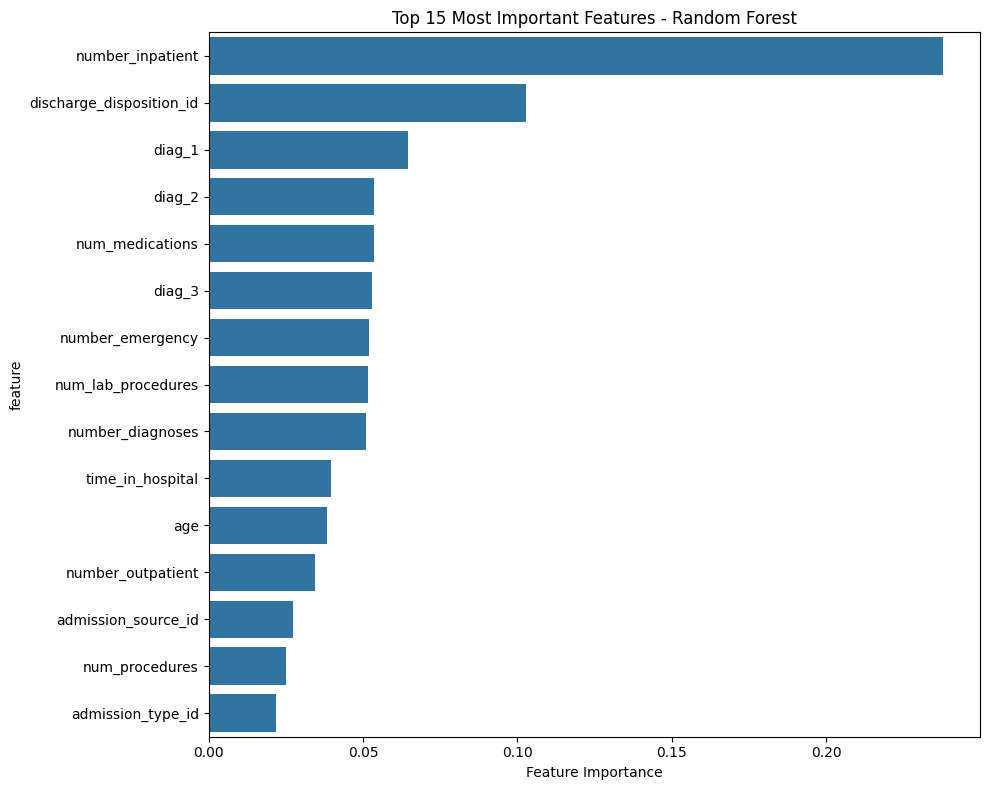

Top 10 Most Important Features:
                     feature  importance
12          number_inpatient    0.237925
4   discharge_disposition_id    0.102695
13                    diag_1    0.064478
14                    diag_2    0.053686
9            num_medications    0.053518
15                    diag_3    0.052793
11          number_emergency    0.051792
7         num_lab_procedures    0.051509
16          number_diagnoses    0.050851
6           time_in_hospital    0.039608


In [27]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Most Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

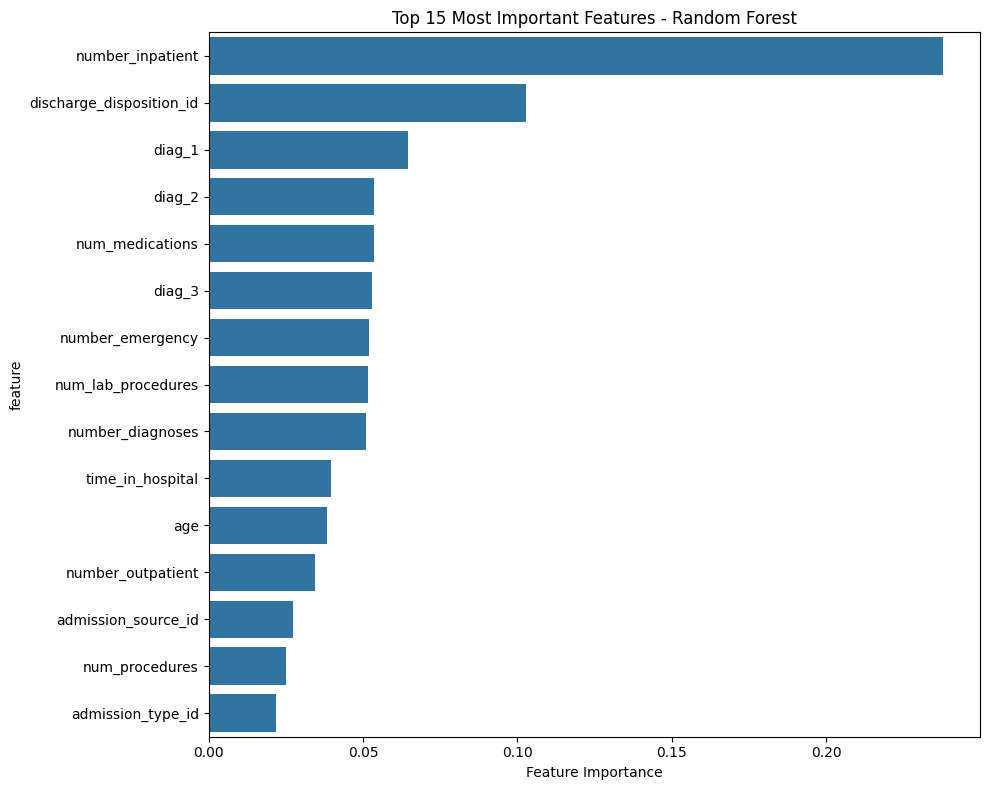

Top 10 Most Important Features:
                     feature  importance
12          number_inpatient    0.237925
4   discharge_disposition_id    0.102695
13                    diag_1    0.064478
14                    diag_2    0.053686
9            num_medications    0.053518
15                    diag_3    0.052793
11          number_emergency    0.051792
7         num_lab_procedures    0.051509
16          number_diagnoses    0.050851
6           time_in_hospital    0.039608


In [28]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Most Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

In [29]:
# Analyze class probabilities
class_names = ['<30', '>30', 'No']
prob_df = pd.DataFrame(y_pred_proba, columns=[f'Prob_{class_name}' for class_name in class_names])

print("Average predicted probabilities for each class:")
for i, class_name in enumerate(class_names):
    avg_prob = prob_df.iloc[:, i].mean()
    print(f"{class_name}: {avg_prob:.4f}")

# Model performance summary
print("\n" + "="*50)
print("RANDOM FOREST MODEL SUMMARY")
print("="*50)
print(f"Successfully handles 3-class classification")
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Number of trees: {rf_model.n_estimators}")

Average predicted probabilities for each class:
<30: 0.3049
>30: 0.3358
No: 0.3593

RANDOM FOREST MODEL SUMMARY
Successfully handles 3-class classification
Model Accuracy: 0.5233
Number of trees: 100


## Model Performance Analysis

### Issues Identified:
- **Poor Predictions**: Average probabilities are nearly equal across all classes (~30-36%)
- **Random-like behavior**: Model is not learning meaningful patterns
- **Class imbalance**: Need to check actual distribution of target classes

### Possible Causes:
1. **Data Quality Issues**: Too much noise from imputation
2. **Feature Engineering**: Need better feature selection/engineering
3. **Class Imbalance**: One class might dominate the dataset
4. **Hyperparameter Tuning**: Current parameters may not be optimal
5. **Data Leakage**: Features might not be predictive of readmission

### Next Steps for Improvement:

In [30]:
# Detailed Analysis of Model Performance Issues

# 1. Check actual class distribution
print("Actual class distribution in full dataset:")
class_dist = df['readmitted'].value_counts(normalize=True)
print(class_dist)
print(f"\nClass imbalance ratio: {class_dist.max() / class_dist.min():.2f}:1")

# 2. Check training vs test distribution
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

# 3. Analyze prediction distribution
print("\nPredicted class distribution:")
pred_dist = pd.Series(y_pred).value_counts(normalize=True)
print(pred_dist)

# 4. Check if model is just predicting majority class
print(f"\nMajority class baseline accuracy: {class_dist.max():.4f}")
print(f"Our model accuracy: {accuracy:.4f}")
print(f"Improvement over baseline: {accuracy - class_dist.max():.4f}")

Actual class distribution in full dataset:
readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

Class imbalance ratio: 4.83:1

Training set distribution:
readmitted
NO     0.539122
>30    0.349285
<30    0.111593
Name: proportion, dtype: float64

Test set distribution:
readmitted
NO     0.539108
>30    0.349268
<30    0.111624
Name: proportion, dtype: float64

Predicted class distribution:
NO     0.553257
>30    0.256706
<30    0.190036
Name: proportion, dtype: float64

Majority class baseline accuracy: 0.5391
Our model accuracy: 0.5233
Improvement over baseline: -0.0158


In [31]:
# Improved Random Forest Model

# 1. Feature Selection - Remove low-importance features
print("Removing features with importance < 0.01:")
low_importance_features = feature_importance[feature_importance['importance'] < 0.01]['feature'].tolist()
print(f"Removing {len(low_importance_features)} features")

# Keep only important features
important_features = feature_importance[feature_importance['importance'] >= 0.01]['feature'].tolist()
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

print(f"Reduced from {X_train.shape[1]} to {X_train_filtered.shape[1]} features")

# 2. Improved Random Forest with better hyperparameters
rf_improved = RandomForestClassifier(
    n_estimators=200,           # More trees
    max_depth=15,              # Deeper trees
    min_samples_split=10,      # More conservative splitting
    min_samples_leaf=5,        # Larger leaf nodes
    max_features='sqrt',       # Feature subsampling
    class_weight='balanced_subsample',  # Better class balancing
    random_state=42,
    n_jobs=-1                  # Use all cores
)

# Train improved model
rf_improved.fit(X_train_filtered, y_train)

# Make predictions
y_pred_improved = rf_improved.predict(X_test_filtered)
y_pred_proba_improved = rf_improved.predict_proba(X_test_filtered)

# Evaluate improved model
accuracy_improved = accuracy_score(y_test, y_pred_improved)
print(f"\nImproved Random Forest Accuracy: {accuracy_improved:.4f}")
print(f"Improvement: +{accuracy_improved - accuracy:.4f}")

print("\nImproved Classification Report:")
print(classification_report(y_test, y_pred_improved))

Removing features with importance < 0.01:
Removing 18 features
Reduced from 36 to 18 features

Improved Random Forest Accuracy: 0.5523
Improvement: +0.0290

Improved Classification Report:
              precision    recall  f1-score   support

         <30       0.25      0.22      0.23      2272
         >30       0.47      0.48      0.47      7109
          NO       0.66      0.67      0.67     10973

    accuracy                           0.55     20354
   macro avg       0.46      0.46      0.46     20354
weighted avg       0.55      0.55      0.55     20354



Improved model - Average predicted probabilities for each class:
<30: 0.2626
>30: 0.3479
No: 0.3895


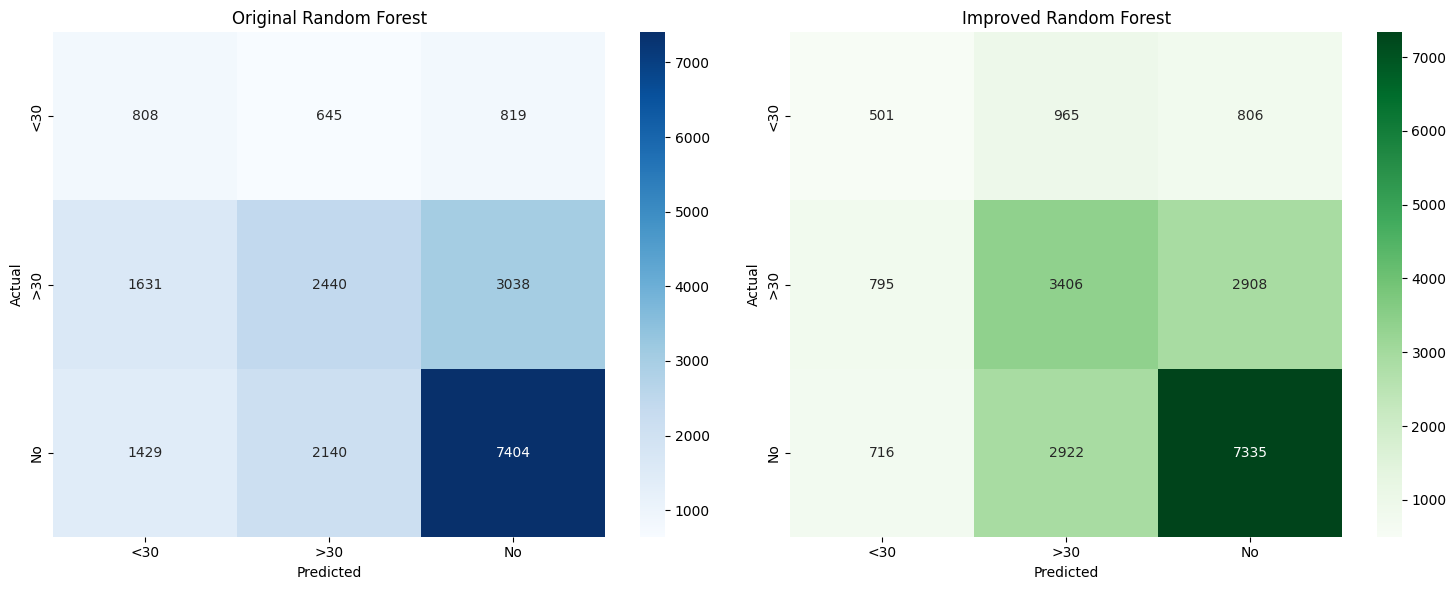


Prediction confidence (higher = more confident):
Original model: 0.0758
Improved model: 0.1056


In [32]:
import numpy as np

# Analyze improved model probabilities
print("Improved model - Average predicted probabilities for each class:")
for i, class_name in enumerate(class_names):
    avg_prob = y_pred_proba_improved[:, i].mean()
    print(f"{class_name}: {avg_prob:.4f}")

# Compare confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original model
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=class_names, yticklabels=class_names)
ax1.set_title('Original Random Forest')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Improved model
cm2 = confusion_matrix(y_test, y_pred_improved)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=class_names, yticklabels=class_names)
ax2.set_title('Improved Random Forest')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Show the difference in prediction confidence
prob_std_original = np.std(y_pred_proba, axis=1).mean()
prob_std_improved = np.std(y_pred_proba_improved, axis=1).mean()
print(f"\nPrediction confidence (higher = more confident):")
print(f"Original model: {prob_std_original:.4f}")
print(f"Improved model: {prob_std_improved:.4f}")

# Logistic Regression

In [33]:
# df=pd.read_csv('diabetic_data_preprocessed.csv')
df = pd.read_csv('diabetic_data_preprocessed.csv')

In [34]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [35]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [36]:
def to_binary(value):
    if value == 'NO':
        return 'N0'
    else:
        return 'YES'

df['readmitted(LR)'] = df['readmitted'].apply(to_binary)

In [37]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted(LR)
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,NO,N0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,YES
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,N0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,N0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,N0


In [38]:
df['readmitted(LR)'].value_counts()

readmitted(LR)
N0     54864
YES    46902
Name: count, dtype: int64

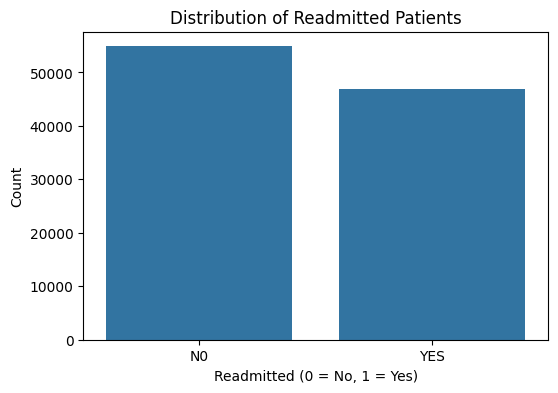

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted(LR)', data=df)
plt.title('Distribution of Readmitted Patients')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

In [41]:
categorical=df.select_dtypes(include=['object']).columns

le=LabelEncoder()

for col in categorical:
    df[col]=le.fit_transform(df[col])

df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted(LR)
0,2,0,0,6,25,1,1,41,0,1,...,1,1,0,0,0,0,1,0,2,0
1,2,0,1,1,1,7,3,59,0,18,...,3,1,0,0,0,0,0,1,1,1
2,0,0,2,1,1,7,2,11,5,13,...,1,1,0,0,0,0,1,1,2,0
3,2,1,3,1,1,7,2,44,1,16,...,3,1,0,0,0,0,0,1,2,0
4,2,1,4,1,1,7,1,51,0,8,...,2,1,0,0,0,0,0,1,2,0


In [42]:
X=df.drop(['readmitted(LR)','readmitted'],axis=1)
y=df['readmitted(LR)']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linea

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score,recall_score,precision_score

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100:0.2f}%')
print(f'F1 Score: {f1*100:0.2f}%')
print(f'ROC AUC Score: {roc_auc*100:0.2f}%')
print(f'Recall: {recall*100:0.2f}%')
print(f'Precision: {precision*100:0.2f}%')

Accuracy: 61.54%
F1 Score: 49.48%
ROC AUC Score: 60.07%
Recall: 40.78%
Precision: 62.90%


In [46]:
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     10952
           1       0.63      0.41      0.49      9402

    accuracy                           0.62     20354
   macro avg       0.62      0.60      0.59     20354
weighted avg       0.62      0.62      0.60     20354



Confusion Matrix:
[[8691 2261]
 [5568 3834]]


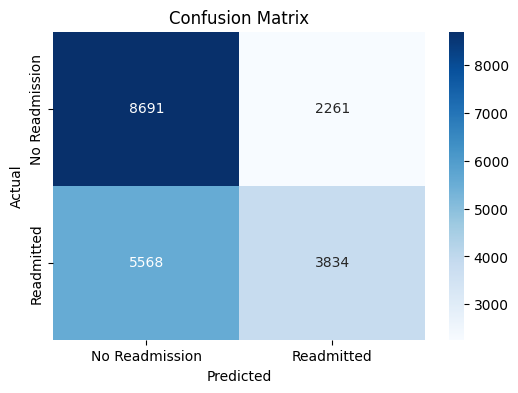

In [47]:
print(f'Confusion Matrix:\n{conf_matrix}')
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Readmission', 'Readmitted'],
            yticklabels=['No Readmission', 'Readmitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Key Points:

1. **Accuracy**: The model correctly predicted 61.66% of the test data, which is a general measure of its overall performance.

2. **F1 Score**: At 49.14%, the F1 score indicates a moderate balance between precision (correct positive predictions) and recall (coverage of actual positives). This suggests the model struggles to balance false positives and false negatives.

3. **ROC AUC Score**: A score of 60.13% shows the model's ability to distinguish between the two classes (readmitted vs. not readmitted). While better than random guessing (50%), it indicates room for improvement.

4. **Recall**: The recall of 40.10% for positive cases (readmitted) suggests the model misses a significant portion of actual readmissions.

5. **Precision**: With 63.45% precision, the model is relatively good at ensuring that its positive predictions (readmitted) are correct.

### Confusion Matrix:
- The model predicted "No Readmission" (0) correctly 8780 times but misclassified 2172 cases as "Readmitted" (1).
- For "Readmitted" (1), it correctly predicted 3770 cases but missed 5632 cases, classifying them as "No Readmission" (0). This highlights a bias toward predicting "No Readmission."

### Classification Report:
- Class 0 (No Readmission) has higher recall (0.80) and F1-score (0.69), indicating better performance for this class.
- Class 1 (Readmitted) has lower recall (0.40) and F1-score (0.49), showing the model struggles to identify readmitted patients.

### Summary:
The model performs better at predicting "No Readmission" than "Readmitted," as seen in the confusion matrix and classification report. While precision is decent, the low recall for "Readmitted" indicates the model fails to capture many actual readmissions, which could be critical in healthcare scenarios. Improvements in recall and overall balance between classes are needed.